# Compare NIST energy levels data

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from ryd_numerov.elements import BaseElement

In [2]:
species = "Sr88_singlet"  # "Rb"
element = BaseElement.from_species(species, use_nist_data=True)
element_without_nist = BaseElement.from_species(species, use_nist_data=False)

energies_with_nist = []
energies_without_nist = []
labels = []

l_int2str = {0: "s", 1: "p", 2: "d", 3: "f", 4: "g", 5: "h", 6: "i", 7: "j"}
for n in range(25):
    for l in range(n):
        if not element.is_allowed_shell(n, l):
            continue
        for _j in np.arange(abs(l - element.s), l + element.s + 1):
            j = float(_j)
            if (n, l, j) not in element._nist_energy_levels:  # noqa: SLF001
                continue

            labels.append(f"{n}{l_int2str.get(l, ',' + str(l))}_{j:.1f}")
            energies_with_nist.append(element.calc_energy(n, l, j, unit="hartree"))
            energies_without_nist.append(element_without_nist.calc_energy(n, l, j, unit="hartree"))

energies_with_nist = np.array(energies_with_nist) + element.get_ionization_energy(unit="hartree")
energies_without_nist = np.array(energies_without_nist) + element_without_nist.get_ionization_energy(unit="hartree")

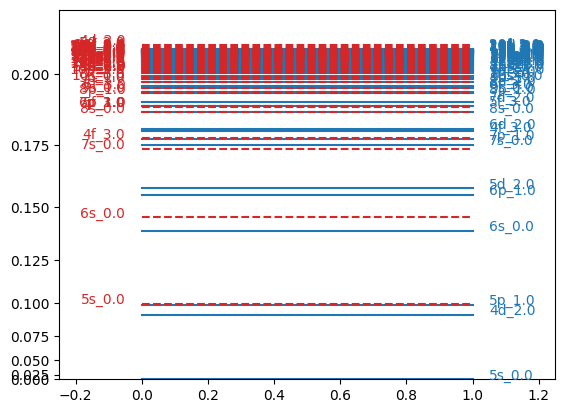

In [3]:
fig, ax = plt.subplots()

y_max = 0.22

for i, label in enumerate(labels):
    if energies_with_nist[i] >= y_max or energies_without_nist[i] >= y_max:
        continue
    if energies_with_nist[i] < 0 or energies_without_nist[i] < 0:
        print(
            f"Skipping negative energy for {label}: "
            f"{energies_with_nist[i]} (with NIST), "
            f"{energies_without_nist[i]} (without NIST)"
        )
        continue
    ax.plot([0, 1], [energies_with_nist[i]] * 2, "C0", zorder=-10)
    ax.plot([0, 1], [energies_without_nist[i]] * 2, "C3--", zorder=10)
    ax.text(1.05, energies_with_nist[i], label, color="C0")
    ax.text(-0.05, energies_without_nist[i], label, color="C3", ha="right")

ax.set_xlim(-0.25, 1.25)
ax.set_ylim(0, y_max)

power = 2


def func(x: float) -> float:
    return np.power(x, power)


def inv_func(y: float) -> float:
    return np.power(y, 1 / power)


ax.set_yscale(mpl.scale.FuncScale(ax, (func, inv_func)))

plt.show()

[]

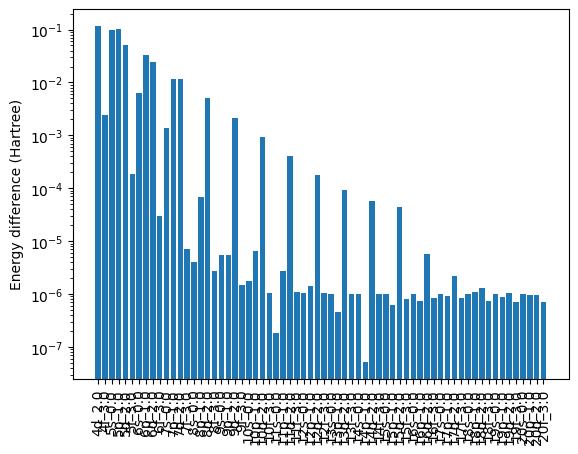

In [4]:
energies_diff = np.abs(np.array(energies_with_nist) - np.array(energies_without_nist))

fig, ax = plt.subplots()
ax.bar(np.arange(len(energies_diff)), energies_diff, tick_label=labels, color="C0")
ax.set_ylabel("Energy difference (Hartree)")
ax.set_xticklabels(labels, rotation=90)

ax.set_yscale("log")

plt.plot()